In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import wrangle as w
import model as m
import warnings
warnings.filterwarnings('ignore')

# Project Description
The purpose of this project is to explore the game statistics of Browns football games and come up with recommendations for the best strategy for them to win a game. I will also create a model that can accurately predict the outcome of the game. 

# Executive Summary 
* Browns lose more games than they win
* Features used for model consisted of rushing yards and turnovers forced. The best model predicted the outcome of the game 4% better than the baseline
* Recommend Browns strategy to win should consist of increasing their average rushing yards on offense and average number of forced turnovers in each game on defense. 
* Next Steps consist of exploring the variables pass yards and points allowed to determine if they have a significant association with the outcome of the game

# Data Dictionary

| Feature | Definition |
|:--------|:-----------|
|result| outcome of the game: W (win) or L(loss)|
|location| home for games played at browns stadium, away for all others|
|rush_yards_gained| rushing yards achieved by browns offense |
|total_yards_allowed| total yards browns defense allowed other team's offense to achieve |
|turnovers forced| number of turnovers created by browns defense|

# Acquire 

In [2]:
# acquire data 
df = w.acquire_prep_data()

In [3]:
# split data into train, validate and test dataset
train, validate, test = w.split_data(df)

# Data Exploration

## How many games have the Browns won and lost in the past 3.5 seasons?

In [4]:
# what is the percentage of wins and losses for the Browns
df.result.value_counts(normalize=True)

L    0.507692
W    0.492308
Name: result, dtype: float64

In [5]:
# # what is the count of wins and losses for the Browns
df.result.value_counts()

L    33
W    32
Name: result, dtype: int64

### Takeaways
- Browns lose more than they win 

## Is there an association between the location and result of the game? 

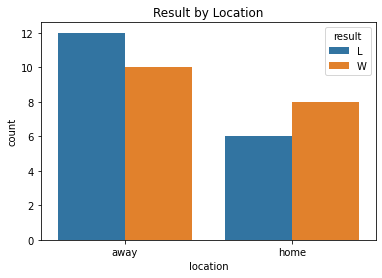

In [6]:
# visualize game result by location
w.countplot(train,"location","result")

### Hypothesis: 

**Ho: There is no association between result and location.**<br>
**Ha: There is an association between result and location.** 

In [7]:
# chi square test results 
w.chi_square(train,"result","location")

chi^2 = 0.1169
p     = 0.7324398999038724


### Takeaways 
- Browns win more games at home then away
- Results of chi square test do not support an association between these two variables 
- Do not consider using game location for model

## Is there an association betweeen rushing yards and result of the game?

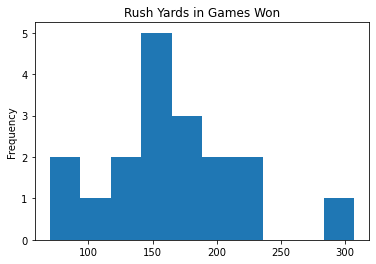

In [8]:
# distribution of browns games won and rushing yards 
w.histogram_rush_wins(train)

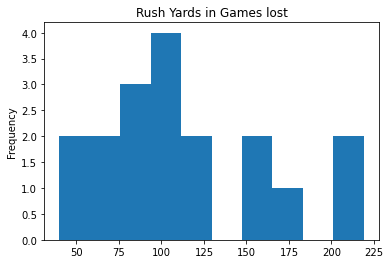

In [9]:
# distribution of browns games lost and rushing yards 
w.histogram_rush_loss(train)

### Hypothesis: 

**Ho: Mean rushing yards in games won <= Mean of rush yards in all games.**<br>
**Ha: Mean of rushing yards in games won is > Mean of rush yards in all games.** 

In [10]:
# results of statistical test 
w.ttest_ind_rushing(train)

t = -2.8096
p/2     = 0.004104438372629666


### Takeaways
- Reject null hypothesis and accept alternative 
- The statistical test supports an association between rushing yards gained impacts the result of the game
- Consider using rush yards gained for model 

## Is there an association betweeen turnovers forced and result of the game?

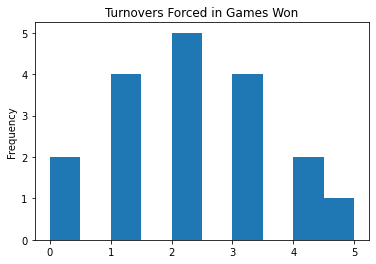

In [11]:
# distribution of browns games won and forced turnovers 
w.histogram_forced_turnovers_wins(train)

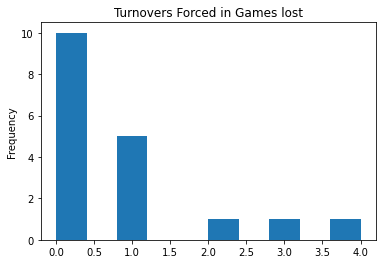

In [12]:
# distribution of browns games lost and forced turnovers 
w.histogram_forced_turnovers_loss(train)

In [13]:
# statistical test results
w.ttest_ind_forced_turnovers(train)

t = -3.2580
p/2     = 0.0012990882723402553


### Hypothesis: 

**Ho: Mean of turnovers forced in games won <= Mean of turnovers forced in games lost.**<br>
**Ha: Mean of turnovers forced in games won is > Mean of turnovers forced in games lost.** 

### Takeaways
- Reject null hypothesis and accept alternative 
- The statistical test supports an association between turnovers forced and game result
- Consider using turnovers forced for model 

## Is there an association betweeen total yards allowed and result of the game?

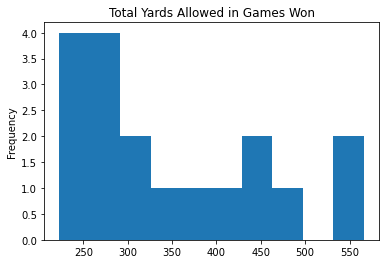

In [14]:
# distribution of total yards allowed in games won
w.histogram_total_yards_allowed_wins(train)

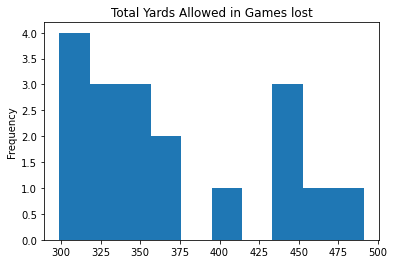

In [15]:
# distribution of total yards allowed in games lost
w.histogram_total_yards_allowed_loss(train)

In [16]:
# statistical test results
w.ttest_ind_total_yards_allowed(train)

t = -0.7684
p/2     = 0.22446426585646911


### Hypothesis: 

**Ho: Mean of total yards allowed in games won <= Mean of total yards allowed in games lost.**<br>
**Ha: Mean of total yards allowed in games won is > Mean of total yards allowed in games lost.** 

### Takeaways
- Accept null hypothesis
- The statistical test does not support an association between total yards allowed and game result
- Do not consider using total yards for model

## Model Preparation

In [17]:
# create model variables 
X_train, X_validate, X_test, y_train, y_validate, y_test = m.model_columns(train,validate,test)

In [18]:
# scaling variables for model
X_train_scaled,X_validate_scaled,X_test_scaled = m.scaling(X_train,X_validate,X_test)

In [19]:
# creating baseline model 
m.baseline_model(y_train)

Baseline Accuracy: 0.5


# Models

### Evaluate models on train data

In [20]:
# decision tree model
m.decision_tree(X_train,y_train,X_train_scaled,y_train)

Accuracy of Decision Tree classifier: 0.50


In [21]:
# knn model
m.knn_model(X_train,y_train,X_train_scaled,y_train)

Accuracy of KNN classifier: 0.50


In [22]:
# random forrest model 
m.random_forrest_model(X_train,y_train,X_train_scaled,y_train)

Accuracy of Random Forrest classifier: 0.50


In [23]:
# logistic regression model 
m.log_reg(X_train,y_train,X_train_scaled,y_train)

Accuracy of Logistic Regression classifier: 0.50


### Evaluate models on validate data

In [24]:
# decision tree model
m.decision_tree(X_train,y_train,X_validate_scaled,y_validate)

Accuracy of Decision Tree classifier: 0.50


In [25]:
# knn model
m.knn_model(X_train,y_train,X_validate_scaled,y_validate)

Accuracy of KNN classifier: 0.50


In [26]:
# random forrest model 
m.random_forrest_model(X_train,y_train,X_validate_scaled,y_validate)

Accuracy of Random Forrest classifier: 0.50


In [27]:
# logistic regression model 
m.log_reg(X_train,y_train,X_validate_scaled,y_validate)

Accuracy of Logistic Regression classifier: 0.50


### Evaluate best model on test data

In [28]:
# random forrest model 
m.random_forrest_model_test(X_train,y_train,X_test_scaled,y_test)

Accuracy of Random Forrest classifier: 0.54


# Conclusion

### Summary
- Browns lose more games than they win 
- Browns win more games at home then away 
- The significant features identified during exploration were rushing yards and forced turnovers
- The location of the game did not have an association with the result of the game 
- The total yards allowed did not have an association with the result of the game 

### Modeling Summary 
- The features used for modeling were rushing yards gained and turnovers forced
- The final model performed 4% better than the baseline model at predicting the result of the game
- I would not recommend this model for production


### Recommendations
* I would recommend the browns center their offensive strategy on rushing the ball
* The defense should focus their strategy on playing aggressive and creating turnovers and not on how many yards they give up


### Next Steps
* With more time I would explore if there is an association between passing yards gained and game result
* Find out if there is a relationship between points allowed by the Browns and the outcome of the game
* Explore more features to combine with rushing yards gained and turnovers forced to find out if that creates a better model